In [ ]:
from google.colab import files

uploaded = files.upload()

Saving tips.csv to tips.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [ ]:
pd.pivot_table(tips,index='day',
                columns = 'size',
                values='total_bill',
                aggfunc = 'count',fill_value = 0
)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [ ]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [ ]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x : x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

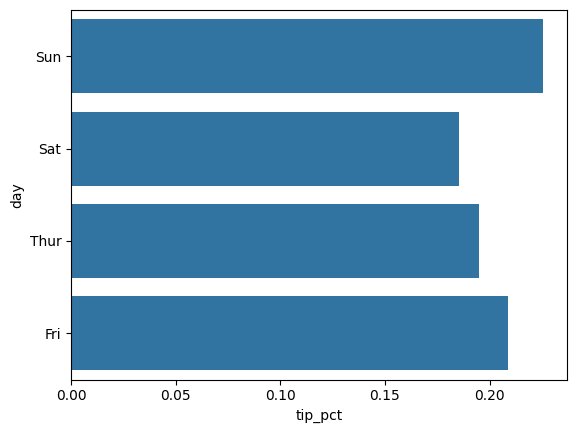

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient = 'h', errorbar = None )

<Axes: xlabel='tip_pct', ylabel='day'>

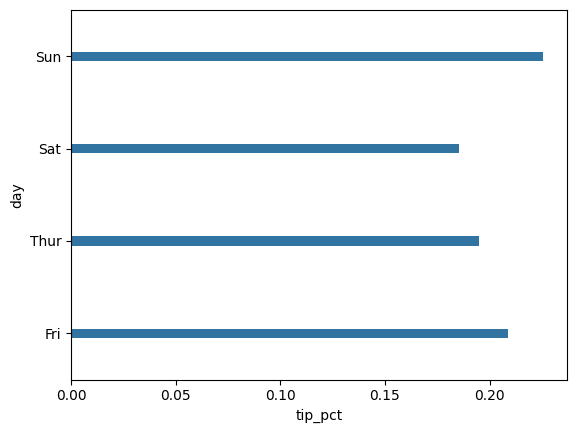

In [ ]:

sns.barplot(x='tip_pct',y='day',data=tips, orient = 'h', errorbar = None , width = 0.1)

<Axes: xlabel='tip_pct', ylabel='day'>

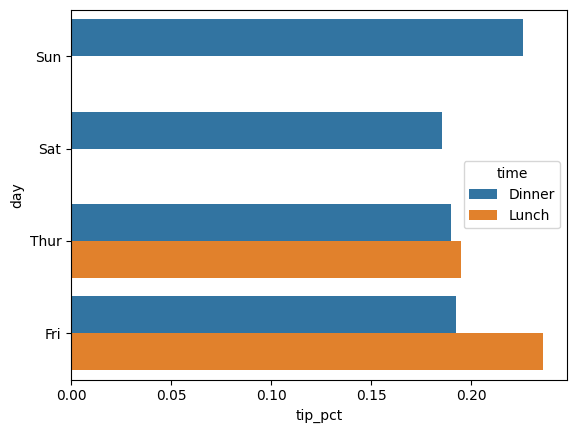

In [ ]:
sns.barplot(x='tip_pct',y='day', hue = 'time', data=tips, orient = 'h', errorbar = None , width = 0.8)

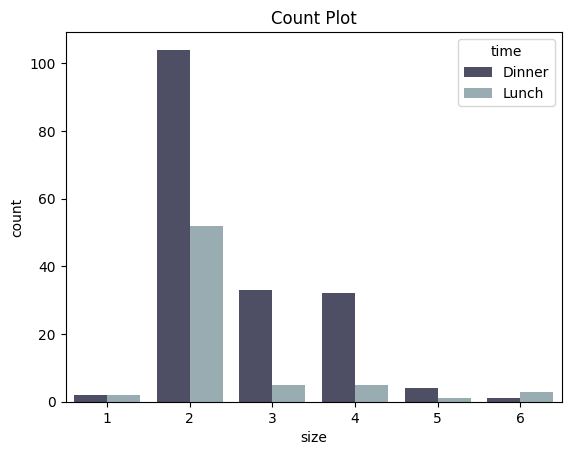

In [ ]:
# countplot()
import seaborn as sns

sns.countplot(x = 'size',data = tips, hue='time', palette = 'bone')
plt.title("Count Plot")
plt.show()

In [ ]:
import seaborn as sns
availiable_styles = sns.axes_style()
print(availiable_styles)

{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


AttributeError: module 'matplotlib' has no attribute 'title'

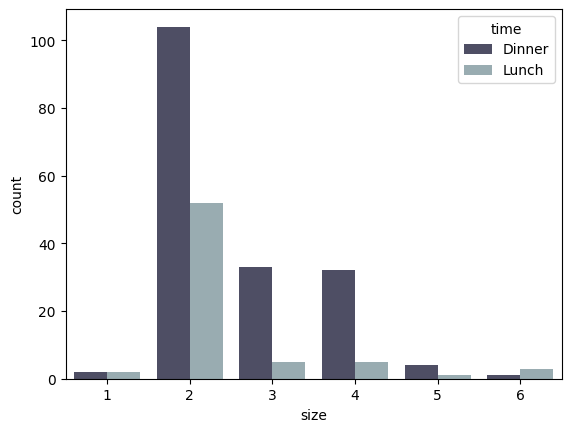

In [ ]:
# countplot()
import seaborn as sns
import  matplotlib as plt
sns.countplot(x = 'size',data = tips, hue='time', palette = 'bone')
plt.title("Count Plot")
plt.show()

<ipython-input-33-a273dac15823>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tip_pct',y='day',data=tips, orient = 'h', palette = 'bone')


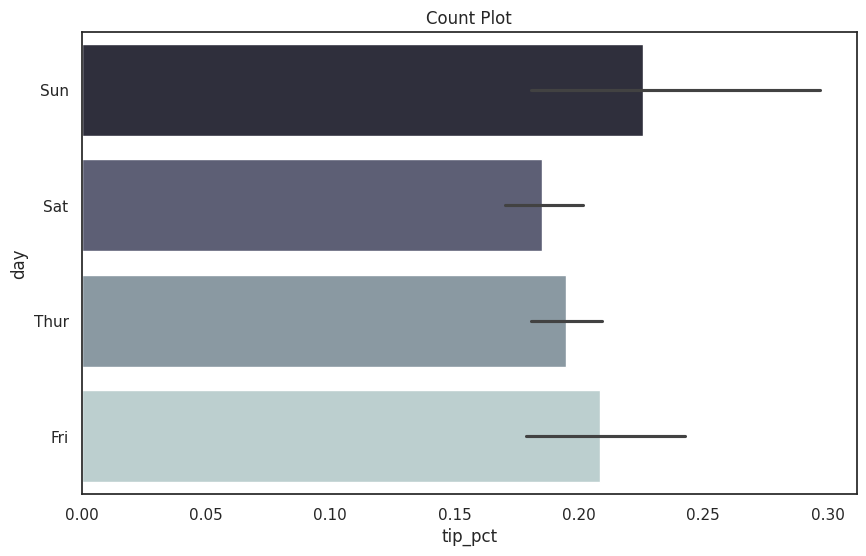

In [ ]:
# 요일별 팁의 비중을 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.set(style='white')
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
sns.barplot(x='tip_pct',y='day',data=tips, orient = 'h', palette = 'bone')
plt.title("Count Plot")
plt.show()

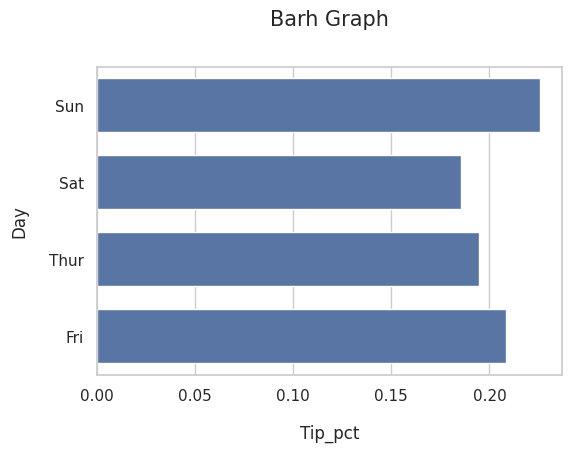

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어
plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.890202
std        5.158498
min       -3.169579
25%       -0.073922
50%        3.446339
75%        9.798310
max       14.335405
dtype: float64

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

<ipython-input-42-8d345e0a5189>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values,kde=True,bins = 100)


<Axes: ylabel='Density'>

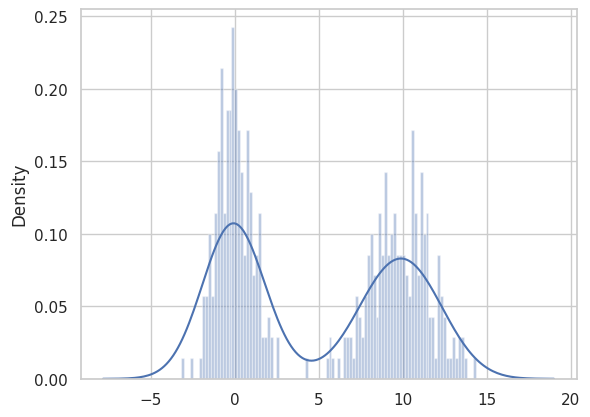

In [ ]:
sns.distplot(values,kde=True,bins = 100)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cov.csv to cov.csv


In [ ]:
fish_multi = pd.read_csv('fm2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


<Axes: xlabel='length', ylabel='Count'>

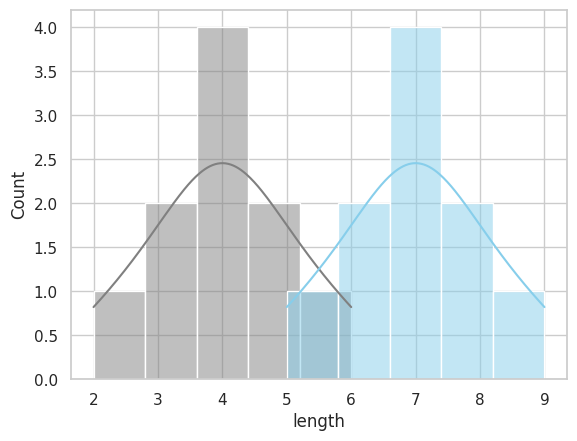

In [ ]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']
sns.histplot(length_a,kde=True,bins = 5,color = 'gray' )
sns.histplot(length_b,kde=True,bins = 5, color = 'skyblue')

<Axes: xlabel='species', ylabel='length'>

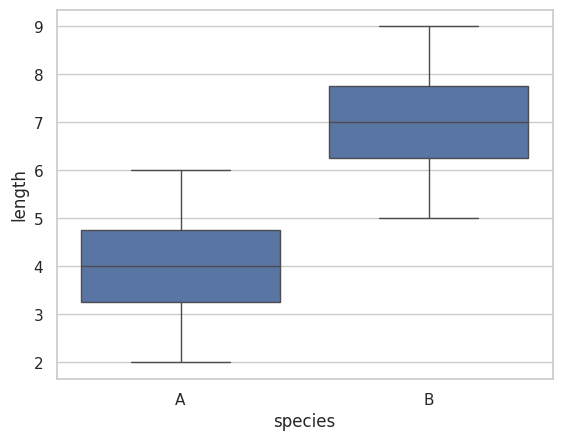

In [ ]:
# Q. box plot으로 A,B비교
sns.boxplot(x='species',y='length',data=fish_multi)

<Axes: xlabel='species', ylabel='length'>

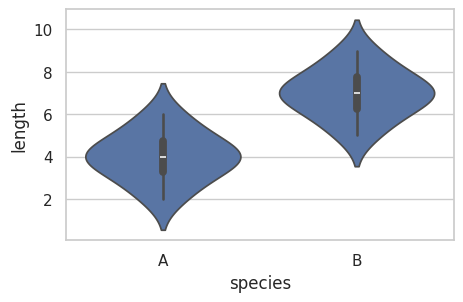

In [ ]:
# 바이올린 플룻 : 박스 플룻과 커널 밀도 추정을 결합한 형태로 데이터의 형태를 좀 더 직관적으로 이해할 수 있게 해준다
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
plt.figure(figsize=(5,3))
sns.violinplot(x='species',y='length',data=fish_multi)

In [ ]:
cov_data = pd.read_csv('cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


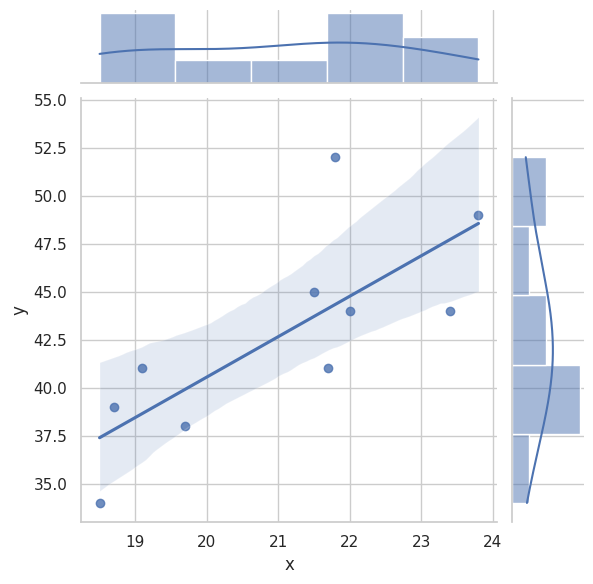

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x', y='y', data=cov_data, kind='reg')
plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [ ]:
# 'x' 와 'y' 열을 데이터 포인트로 사용하고, 'category' 열에 따라 서로 다른 색상의 선형 회귀선을 그렸습니다.
# 각 카테고리('A',와 'B')에 대한 회귀선이 서로 다른 색상으로 표시
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#임의의 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x':np.random.rand(50),
    'y':np.random.rand(50),
    'category':np.random.choice(['A','B'],50)
})

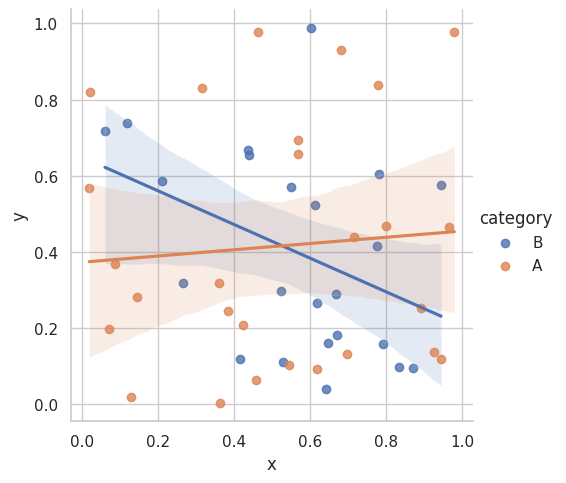

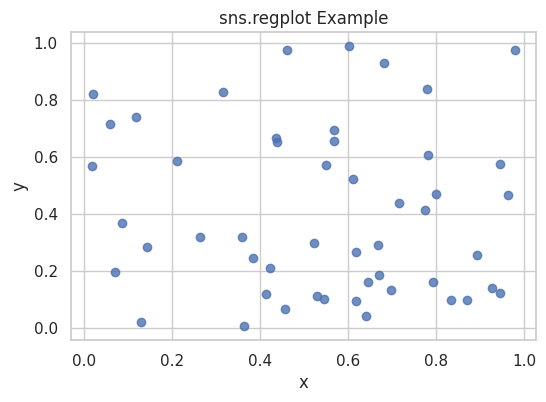

In [ ]:
# sns.lmplot 사용 예시
sns.lmplot(x='x',y='y',data=data,hue='category')
plt.show()

# sns.regplot 사용예시
plt.figure(figsize=(6,4))
sns.regplot(x='x',y='y',data=data,fit_reg=False)
plt.title('sns.regplot Example')
plt.show()

In [ ]:
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [ ]:
df_auto = pd.read_excel('/content/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: xlabel='mpg'>

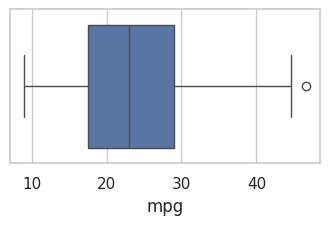

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df_auto, x='mpg')

<Axes: ylabel='mpg'>

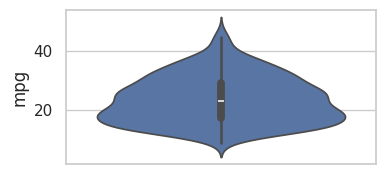

In [ ]:
plt.figure(figsize=(4,2))
sns.violinplot(data=df_auto, y='mpg')

<Axes: xlabel='mpg'>

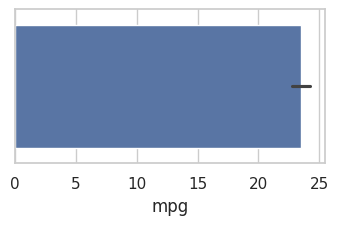

In [ ]:
plt.figure(figsize=(4,2))
sns.barplot(data=df_auto, x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

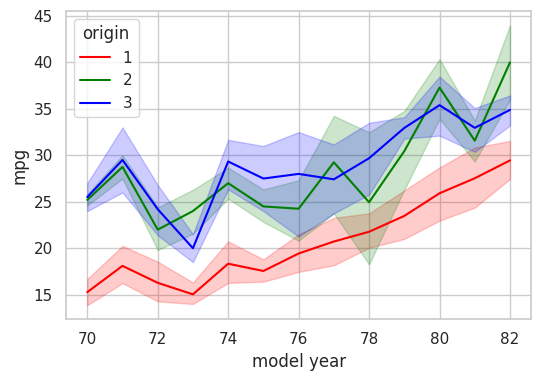

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto, x='model year', y='mpg',hue = 'origin', err_style='band', palette=['red','green','blue'])
plt.show()

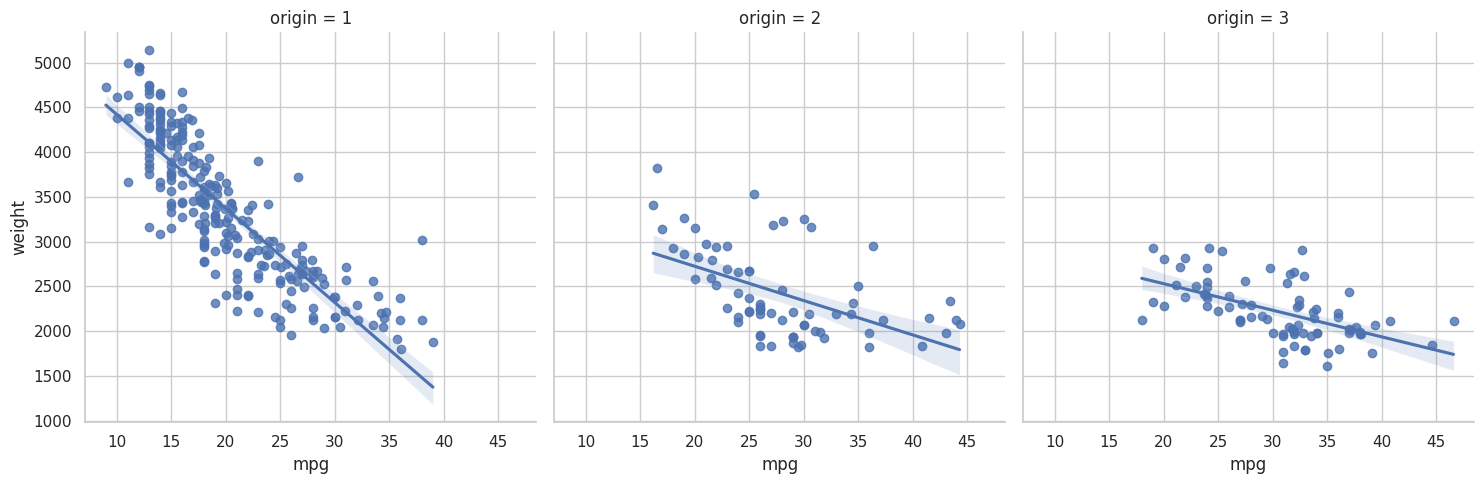

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 프레임 df_auto 정의 필요 (예: sns.load_dataset('mpg')사용 가능)

#mpg와 weight의 관계

sns.lmplot(x='mpg',y='weight',data=df_auto, col = 'origin', col_wrap=3)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

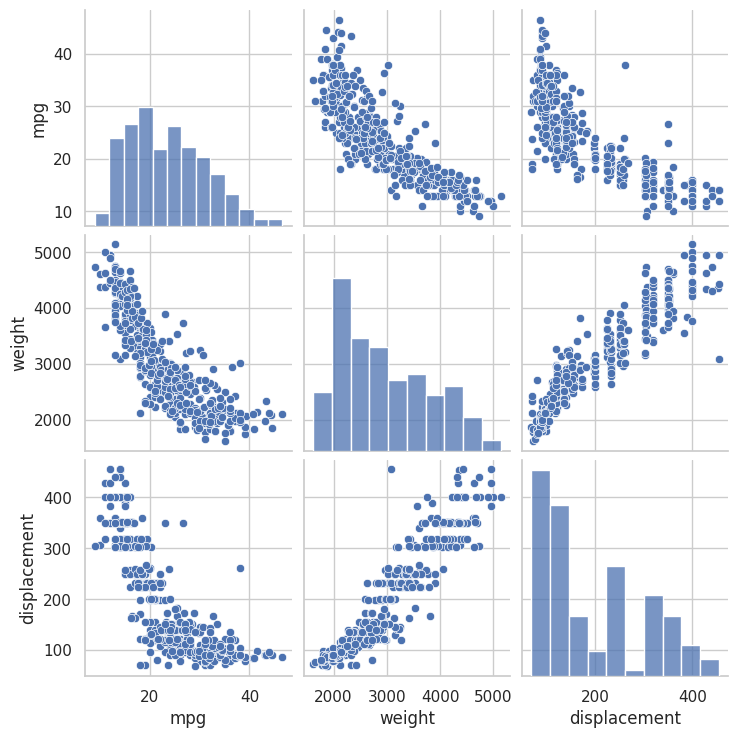

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_auto[['mpg','weight','displacement']], palette = 'rainbow')

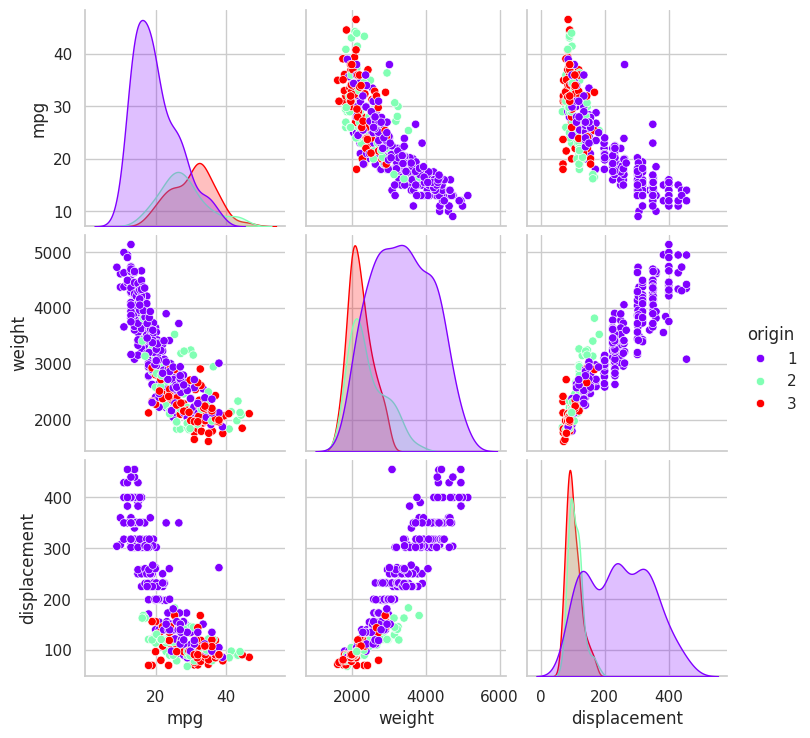

In [ ]:
sns.pairplot(df_auto[['mpg','weight','displacement','origin']], palette = 'rainbow',hue='origin',diag_kind='kde')

In [ ]:
t_df = sns.load_dataset('titanic')
t_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


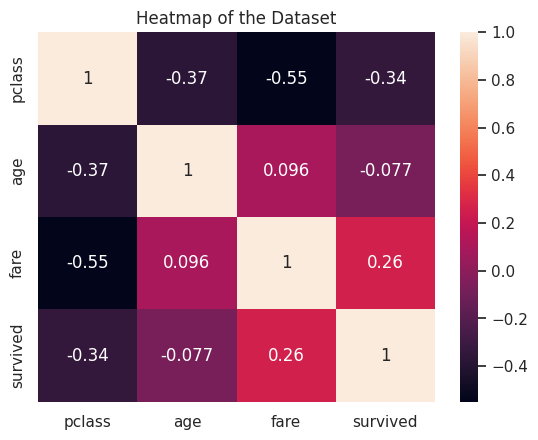

In [ ]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',pad = 20, fontsize=20)
plt.show()